In [5]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#execute shell commands to download the dataset
! curl http://ufldl.stanford.edu/housenumbers/train_32x32.mat > /tmp/train_32x32.mat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  173M  100  173M    0     0  2073k      0  0:01:25  0:01:25 --:--:-- 2309k:02:00  0:00:24  0:01:36 2002k


In [40]:
# Load the SVHN dataset
data = loadmat('/tmp/train_32x32.mat')
# Extract images and labels
x = data['X']
y = data['y']
print(x.shape)
print(y.shape)

(32, 32, 3, 73257)
(73257, 1)


In [41]:
# SVHN data is in (32, 32, 3, N) format, so we need to transpose to (N, 32, 32, 3)
x = np.transpose(x, (3, 0, 1, 2))
print(x.shape)

(73257, 32, 32, 3)


In [42]:
# Replace label 10 with 0 (SVHN uses '10' for digit '0')
y[y == 10] = 0

In [43]:
# Display some example images from the dataset
def plot_examples(images, labels, n=10):
    plt.figure(figsize=(10, 1))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis('off')
    plt.show()

/var/folders/vr/sxc1jhmd7b32kypjhkt0yqch0000gn/T/ipykernel_15994/1085074279.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(labels[i]))


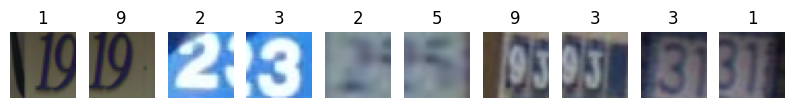

In [44]:
plot_examples(x, y)

# Here starts the solution

In [45]:
# Normalize images to [0, 1] range
x = x.astype('float32') / 255.0

In [46]:
# Split the dataset into 50% training, 25% validation, and 25% test sets
from sklearn.model_selection import train_test_split

# Split into 50% train, 25% validation, and 25% test
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.5, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(x_train.shape, x_val.shape, x_test.shape)

(36628, 32, 32, 3) (18314, 32, 32, 3) (18315, 32, 32, 3)


In [47]:
from tensorflow.keras.utils import to_categorical
print(y_train.shape, y_val.shape, y_test.shape)
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape, y_val.shape, y_test.shape)

(36628, 1) (18314, 1) (18315, 1)
(36628, 10) (18314, 10) (18315, 10)


In [52]:
# Define CNN Classifier
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [53]:
model = create_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,610 (631.29 KB)

 Trainable params: 160,906 (628.54 KB)

 Non-trainable params: 704 (2.75 KB)

In [54]:
# Train Model with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64,
                    validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.3199 - loss: 2.0366 - val_accuracy: 0.7849 - val_loss: 0.7302
Epoch 2/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7415 - loss: 0.8198 - val_accuracy: 0.8023 - val_loss: 0.6359
Epoch 3/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7918 - loss: 0.6706 - val_accuracy: 0.8699 - val_loss: 0.4478
Epoch 4/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8187 - loss: 0.5848 - val_accuracy: 0.8800 - val_loss: 0.4017
Epoch 5/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8339 - loss: 0.5334 - val_accuracy: 0.8853 - val_loss: 0.3803
Epoch 6/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8469 - loss: 0.4946 - val_accuracy: 0.8766 - val_loss: 0.3936
Epoch 7/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8529 - loss: 0.4747 - val_accuracy: 0.8895 - val_loss: 0.3731
Epoch 8/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.8602 - loss: 0.4549 - 

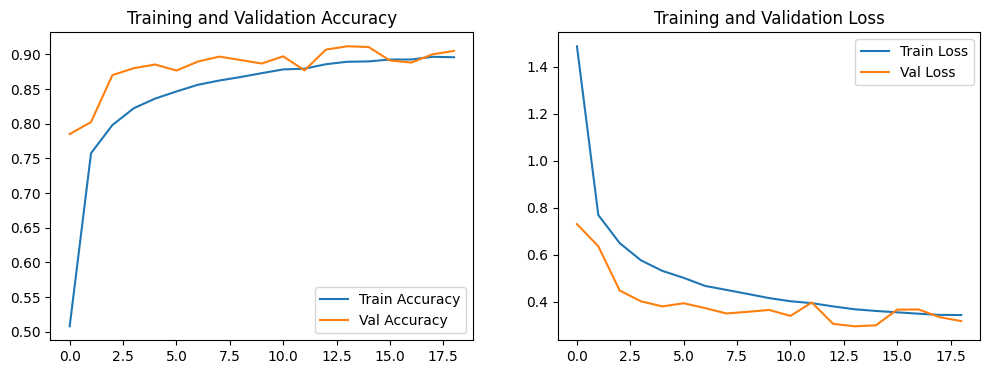

In [55]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [57]:
# ROC Curve
def plot_roc_curve(X_test, y_test, model):
    y_pred_proba = model.predict(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.6f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


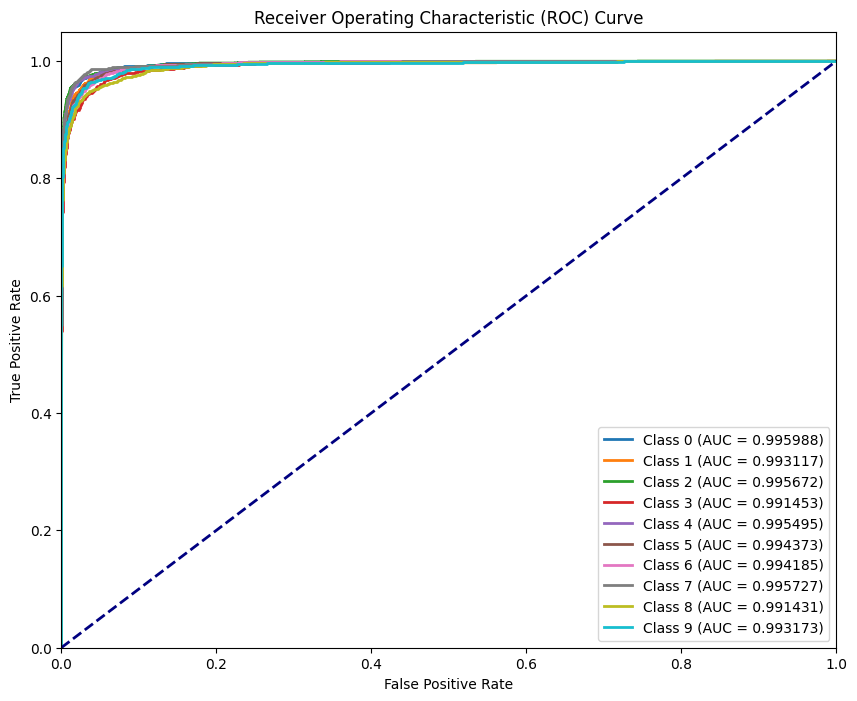

In [58]:
plot_roc_curve(x_test, y_test, model)

573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


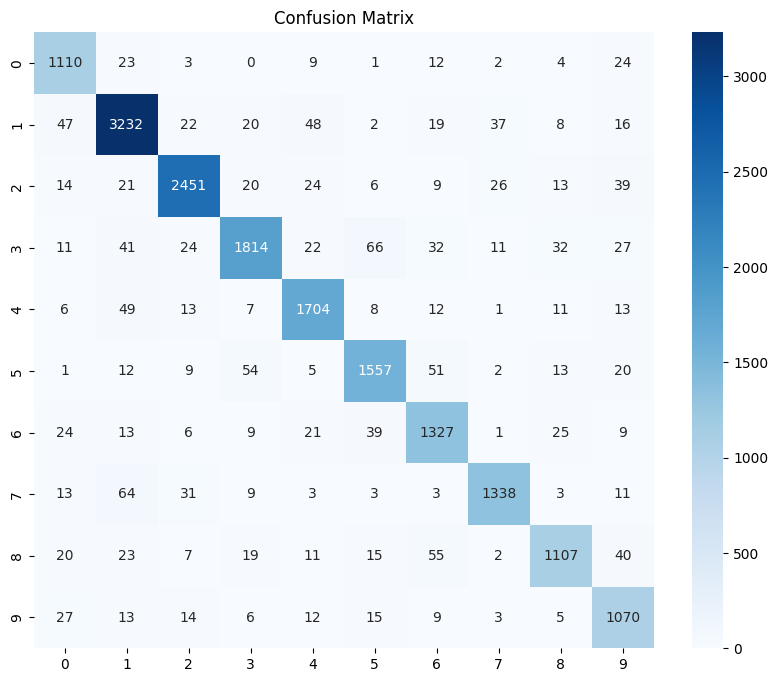

In [61]:
# Predict test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()